In [1]:
import os
import sys
import numpy as np
from matplotlib import pyplot as plt
from scipy.interpolate import interp1d

from mockfactory import Catalog, utils
from pypower import BaseMatrix, CatalogFFTPower, CatalogSmoothWindow, PowerSpectrumSmoothWindow, PowerSpectrumSmoothWindowMatrix, setup_logging
sys.path.append('../bin')
from wmatrix_utils import plot_matrix
from power_spectrum import naming

plt.style.use(os.path.join(os.path.abspath(''), 'plot_style.mplstyle'))
plots_dir = '../../plots/'

In [2]:
tracer = 'ELG_LOP'
completeness = "complete_"
rp_cut = 0
direct = rp_cut

## Window matrix

In [3]:
masked = False
highres = True
region = 'SGC'

window_dir = '/global/cfs/cdirs/desi/users/mpinon/secondGenMocksY1/windows/'
wm_fn = naming(filetype='wm', data_type='{}Y1secondgenmocks'.format('' if masked else 'raw'), imock=None if masked else 0, tracer=tracer, completeness=completeness, region=region, rpcut=rp_cut, direct_edges=direct)
wm_raw = BaseMatrix.load(os.path.join(window_dir, wm_fn.format('')))

In [4]:
masked = False
highres = True
region = 'SGC'

window_dir = '/global/cfs/cdirs/desi/users/mpinon/secondGenMocksY1/windows/'
wm_fn = naming(filetype='wm', data_type='{}Y1secondgenmocks'.format('' if masked else 'raw'), imock=None if masked else 0, tracer=tracer, completeness=completeness, region=region, rpcut=rp_cut, direct_edges=direct)
wm_raw_box1000 = BaseMatrix.load(os.path.join(window_dir, wm_fn.format('_minboxsize1000')))

In [5]:
masked = True
highres = False
region = 'SGC'

window_dir = '/global/cfs/cdirs/desi/users/mpinon/secondGenMocksY1/windows/old'
wm_fn = naming(filetype='wm', data_type='{}Y1secondgenmocks'.format('' if masked else 'raw'), imock=None if masked else 0, tracer=tracer, completeness=completeness, region=region, rpcut=rp_cut, direct_edges=direct)
wm_masked = BaseMatrix.load(os.path.join(window_dir, wm_fn.format('')))

In [6]:
masked = True
highres = False
region = 'SGC'

window_dir = '/global/cfs/cdirs/desi/users/mpinon/secondGenMocksY1/windows/old'
wm_fn = naming(filetype='wm', data_type='{}Y1secondgenmocks'.format('' if masked else 'raw'), imock=None if masked else 0, tracer=tracer, completeness=completeness, region=region, rpcut=rp_cut, direct_edges=direct)
wm_masked_box1000 = BaseMatrix.load(os.path.join(window_dir, wm_fn.format('woboxsize20000')))

In [7]:
masked = True
highres = True
region = 'SGC'

window_dir = '/global/cfs/cdirs/desi/users/mpinon/secondGenMocksY1/windows/'
wm_fn = naming(filetype='wm', data_type='{}Y1secondgenmocks'.format('' if masked else 'raw'), imock=None if masked else 0, tracer=tracer, completeness=completeness, region=region, rpcut=rp_cut, direct_edges=direct)
wm_masked_highres = BaseMatrix.load(os.path.join(window_dir, wm_fn.format('')))

In [8]:
rp_cut = 2.5
direct = rp_cut

masked = True
highres = True
region = 'SGC'

window_dir = '/global/cfs/cdirs/desi/users/mpinon/secondGenMocksY1/windows/old'
wm_fn = naming(filetype='wm', data_type='{}Y1secondgenmocks'.format('' if masked else 'raw'), imock=None if masked else 0, tracer=tracer, completeness=completeness, region=region, rpcut=rp_cut, direct_edges=direct)
wm_masked_rpcut = BaseMatrix.load(os.path.join(window_dir, wm_fn.format('')))

In [9]:
rp_cut = 2.5
direct = rp_cut

masked = True
highres = False
region = 'SGC'

window_dir = '/global/cfs/cdirs/desi/users/mpinon/secondGenMocksY1/windows/'
wm_fn = naming(filetype='wm', data_type='{}Y1secondgenmocks'.format('' if masked else 'raw'), imock=None if masked else 0, tracer=tracer, completeness=completeness, region=region, rpcut=rp_cut, direct_edges=direct)
wm_masked_rpcut_highres = BaseMatrix.load(os.path.join(window_dir, wm_fn.format('')))

In [10]:
np.pi * 2076 / 20000

0.32609731744262055

In [11]:
wm_masked_rpcut.xout[0]

array([0.00375906, 0.00807222, 0.01283985, 0.01772895, 0.02267339,
       0.02764374, 0.03263064, 0.03761468, 0.04259837, 0.04758801,
       0.05258202, 0.05757379, 0.06256692, 0.06756714, 0.0725586 ,
       0.07755076, 0.08255084, 0.0875489 , 0.09254705, 0.09754192,
       0.10253621, 0.1075353 , 0.11253841, 0.11753689, 0.12253294,
       0.12753246, 0.13253276, 0.13753023, 0.14252845, 0.14752871,
       0.15252722, 0.15752763, 0.16252696, 0.16752542, 0.17252441,
       0.17752471, 0.18252434, 0.18752306, 0.19252209, 0.19752076,
       0.20252073, 0.20751969, 0.21251949, 0.21751947, 0.22251857,
       0.22751927, 0.23251979, 0.23751818, 0.24251691, 0.24751729,
       0.25251732, 0.25751681, 0.26251577, 0.26751493, 0.27251443,
       0.2775142 , 0.28251414, 0.28751366, 0.29251413, 0.29751379,
       0.30251326, 0.30751373, 0.31251354, 0.31751319, 0.32251269,
       0.3275127 , 0.33251223, 0.33751187, 0.34251227, 0.34751228,
       0.35251199, 0.35751174, 0.36251182, 0.36751187, 0.37251

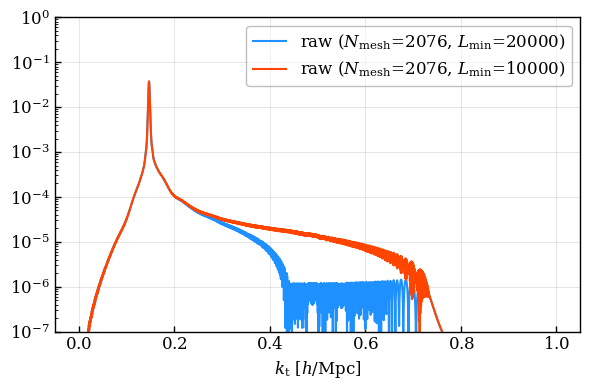

In [12]:
norm = 1.
kout = 0.15
iin = 0
iout = 0

indexout = np.abs(wm_raw.xout[0] - kout).argmin()
plt.plot(wm_raw.xin[iin], np.abs(wm_raw.unpacked()[iin][iout][:, indexout]) / norm, label=r'raw ($N_{\mathrm{mesh}}$=2076, $L_{\mathrm{min}}$=20000)')

indexout = np.abs(wm_raw_box1000.xout[0] - kout).argmin()
plt.plot(wm_raw_box1000.xin[iin], np.abs(wm_raw_box1000.unpacked()[iin][iout][:, indexout]) / norm, label=r'raw ($N_{\mathrm{mesh}}$=2076, $L_{\mathrm{min}}$=10000)')

indexout = np.abs(wm_masked.xout[0] - kout).argmin()
#plt.plot(wm_masked.xin[iin], np.abs(wm_masked.unpacked()[iin][iout][:, indexout]) / norm, label=r'masked ($N_{\mathrm{mesh}}$=1382, $L_{\mathrm{min}}$=20000)')

indexout = np.abs(wm_masked_box1000.xout[0] - kout).argmin()
#plt.plot(wm_masked_box1000.xin[iin], np.abs(wm_masked_box1000.unpacked()[iin][iout][:, indexout]) / norm, label=r'masked ($N_{\mathrm{mesh}}$=1382, $L_{\mathrm{min}}$=10000)')

indexout = np.abs(wm_masked_highres.xout[0] - kout).argmin()
#plt.plot(wm_masked_highres.xin[iin], np.abs(wm_masked_highres.unpacked()[iin][iout][:, indexout]) / norm, label=r'masked ($N_{\mathrm{mesh}}$=2072, $L_{\mathrm{min}}$=10000)')

indexout = np.abs(wm_masked_rpcut.xout[0] - kout).argmin()
#plt.plot(wm_masked_rpcut.xin[iin], np.abs(wm_masked_rpcut.unpacked()[iin][iout][:, indexout]) / norm, label=r'masked, $r_{\perp}$-cut ($N_{\mathrm{mesh}}$=1382)')

indexout = np.abs(wm_masked_rpcut.xout[0] - kout).argmin()
#plt.plot(wm_masked_rpcut.xin[iin], np.abs(wm_raw_rpcut_highres.unpacked()[iin][iout][:, indexout]) / norm, label=r'masked, $r_{\perp}$-cut ($N_{\mathrm{mesh}}$=2072)')

plt.yscale('log')
plt.ylim((1e-7, 1))
plt.xlabel(r'$k_{\mathrm{t}}$ [$h/\mathrm{Mpc}$]')
    
plt.legend()
plt.savefig(os.path.join(plots_dir, 'secondgenmocks_raw_window_fixedkobs0.15_nmeshtests.png'), dpi=300)
plt.show()

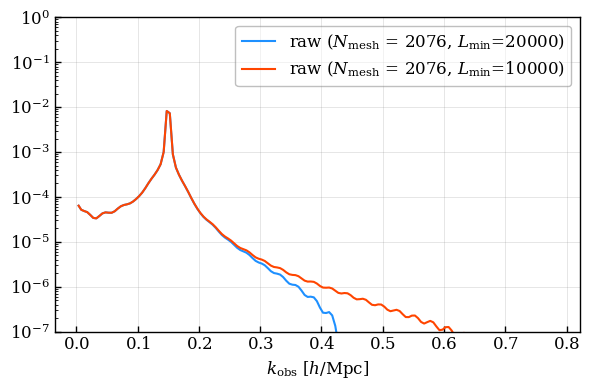

In [13]:
norm = 1.
kin = 0.15
iin = 0
iout = 0

indexin = np.abs(wm_raw.xin[0] - kin).argmin()
plt.plot(wm_raw.xout[iout], np.abs(wm_raw.unpacked()[iin][iout][indexin, ]) / norm, label=r'raw ($N_{\mathrm{mesh}}$ = 2076, $L_{\mathrm{min}}$=20000)')

indexout = np.abs(wm_raw_box1000.xin[0] - kin).argmin()
plt.plot(wm_raw_box1000.xout[iout], np.abs(wm_raw_box1000.unpacked()[iin][iout][indexin, ]) / norm, label=r'raw ($N_{\mathrm{mesh}}$ = 2076, $L_{\mathrm{min}}$=10000)')

indexout = np.abs(wm_masked.xin[0] - kin).argmin()
#plt.plot(wm_masked.xout[iout], np.abs(wm_masked.unpacked()[iin][iout][indexin, ]) / norm, label=r'masked ($N_{\mathrm{mesh}}$ = 1382, $L_{\mathrm{min}}$=20000)')

indexout = np.abs(wm_masked_box1000.xin[0] - kin).argmin()
#plt.plot(wm_masked_box1000.xout[iout], np.abs(wm_masked_box1000.unpacked()[iin][iout][indexin, ]) / norm, label=r'masked ($N_{\mathrm{mesh}}$ = 1382, $L_{\mathrm{min}}$=10000)')

indexout = np.abs(wm_masked_highres.xin[0] - kin).argmin()
#plt.plot(wm_masked_highres.xout[iout], np.abs(wm_masked_highres.unpacked()[iin][iout][indexin, ]) / norm, label=r'masked ($N_{\mathrm{mesh}}$ = 2072, $L_{\mathrm{min}}$=10000)')

indexout = np.abs(wm_masked_rpcut.xin[0] - kin).argmin()
#plt.plot(wm_masked_rpcut.xout[iout], np.abs(wm_masked_rpcut.unpacked()[iin][iout][indexin, ]) / norm, label=r'masked, $r_{\perp}$-cut ($N_{\mathrm{mesh}}$=1382)')

indexout = np.abs(wm_masked_rpcut.xin[0] - kin).argmin()
#plt.plot(wm_masked_rpcut_highres.xout[iout], np.abs(wm_masked_rpcut_highres.unpacked()[iin][iout][indexin, ]) / norm, label=r'masked, $r_{\perp}$-cut ($N_{\mathrm{mesh}}$=2072)')

plt.yscale('log')
plt.ylim((1e-7, 1))
plt.xlabel(r'$k_{\mathrm{obs}}$ [$h/\mathrm{Mpc}$]')
    
plt.legend()
plt.savefig(os.path.join(plots_dir, 'secondgenmocks_raw_window_fixedkin0.15_nmeshtests.png'), dpi=300)
plt.show()

# Comparison between P(k) with high/low nmesh

In [47]:
masked = True
highres = True
rp_cut = 0
direct = False
ells = (0, 2, 4)

## cubic

In [48]:
data_dir = '/global/cfs/cdirs/desi/users/mpinon/cubicSecondGenMocks/pk'
power_cubic_list = []

for imock in range(0, 25):
    for los in 'xyz':
        data_fn = naming(filetype='power', data_type='cubicsecondgenmocks', imock=imock, tracer=tracer[:3], completeness=completeness, region=region, rpcut=0, direct_edges=False, los=los, highres=highres)
        power_cubic = CatalogFFTPower.load(os.path.join(data_dir, data_fn)).poles(ell=ells, complex=False)
        power_cubic_list.append(power_cubic)
k_cubic = CatalogFFTPower.load(os.path.join(data_dir, data_fn)).poles.k
mean_cubic = np.mean(power_cubic_list, axis=0)
std_cubic = np.std(power_cubic_list, axis=0)

## cutsky

In [49]:
data_dir = '/global/cfs/cdirs/desi/users/mpinon/secondGenMocksY1/pk'
power_cutsky_list = []
cutsky_shotnoise_list = list()

for imock in range(0, 25):
    data_fn = naming(filetype='power', data_type='{}Y1secondgenmocks'.format('' if masked else 'raw'), imock=imock, tracer=tracer, completeness=completeness, region=region, rpcut=rp_cut, direct_edges=direct, highres=highres)
    power_cutsky = CatalogFFTPower.load(os.path.join(data_dir, data_fn)).poles(ell=ells, complex=False)
    cutsky_shotnoise_list.append(CatalogFFTPower.load(os.path.join(data_dir, data_fn)).poles.shotnoise)
    power_cutsky_list.append(power_cutsky)
k_cutsky = CatalogFFTPower.load(os.path.join(data_dir, data_fn)).poles.k
mean_cutsky = np.mean(power_cutsky_list, axis=0)
std_cutsky = np.std(power_cutsky_list, axis=0)
mean_cutsky_shotnoise = np.mean(cutsky_shotnoise_list)
print(mean_cutsky_shotnoise)
print(CatalogFFTPower.load(os.path.join(data_dir, data_fn)).poles.attrs['nmesh'])

power_cutsky_list = []

for imock in range(0, 25):
    data_fn = naming(filetype='power', data_type='{}Y1secondgenmocks'.format('' if masked else 'raw'), imock=imock, tracer=tracer, completeness=completeness, region=region, rpcut=rp_cut, direct_edges=direct, highres=False)
    power_cutsky = CatalogFFTPower.load(os.path.join(data_dir, data_fn)).poles(ell=ells, complex=False)
    power_cutsky_list.append(power_cutsky)
k_cutsky_lowres = CatalogFFTPower.load(os.path.join(data_dir, data_fn)).poles.k
mean_cutsky_lowres = np.mean(power_cutsky_list, axis=0)
std_cutsky_lowres = np.std(power_cutsky_list, axis=0)
print(CatalogFFTPower.load(os.path.join(data_dir, data_fn)).poles.attrs['nmesh'])

1742.6234639136278
[2072 2072 2072]
[1382 1382 1382]


In [55]:
k_cutsky_lowres

array([0.00375906, 0.00807222, 0.01283985, 0.01772895, 0.02267339,
       0.02764374, 0.03263064, 0.03761468, 0.04259837, 0.04758801,
       0.05258202, 0.05757379, 0.06256692, 0.06756714, 0.0725586 ,
       0.07755076, 0.08255084, 0.0875489 , 0.09254705, 0.09754192,
       0.10253621, 0.1075353 , 0.11253841, 0.11753689, 0.12253294,
       0.12753246, 0.13253276, 0.13753023, 0.14252845, 0.14752871,
       0.15252722, 0.15752763, 0.16252696, 0.16752542, 0.17252441,
       0.17752471, 0.18252434, 0.18752306, 0.19252209, 0.19752076,
       0.20252073, 0.20751969, 0.21251949, 0.21751947, 0.22251857,
       0.22751927, 0.23251979, 0.23751818, 0.24251691, 0.24751729,
       0.25251732, 0.25751681, 0.26251577, 0.26751493, 0.27251443,
       0.2775142 , 0.28251414, 0.28751366, 0.29251413, 0.29751379,
       0.30251326, 0.30751373, 0.31251354, 0.31751319, 0.32251269,
       0.3275127 , 0.33251223, 0.33751187, 0.34251227, 0.34751228,
       0.35251199, 0.35751174, 0.36251182, 0.36751187, 0.37251

In [54]:
k_cutsky[mask]

array([0.00376088, 0.00804318, 0.01282807, 0.01773017, 0.02267754,
       0.02764356, 0.03262529, 0.03760718, 0.04259093, 0.04758493,
       0.05258099, 0.05756895, 0.06256351, 0.06756429, 0.07255902,
       0.07755388, 0.08255284, 0.08754999, 0.09254353, 0.09754105,
       0.10254185, 0.10754056, 0.1125381 , 0.1175354 , 0.12253397,
       0.12753453, 0.13253356, 0.13753108, 0.14253066, 0.14753129,
       0.15252884, 0.15752586, 0.16252582, 0.16752546, 0.17252366,
       0.17752347, 0.18252419, 0.18752333, 0.19252259, 0.1975218 ,
       0.2025197 , 0.20751917, 0.21252021, 0.21752075, 0.22251923,
       0.22751731, 0.23251735, 0.23751776, 0.24251761, 0.24751744,
       0.25251788, 0.25751685, 0.26251553, 0.26751579, 0.27251468,
       0.27751407, 0.28251417, 0.28751355, 0.29251294, 0.2975136 ,
       0.30251365, 0.30751302, 0.31251319, 0.31751255, 0.32251233,
       0.32751258, 0.33251223, 0.33751216, 0.34251241, 0.34751165,
       0.35251103, 0.35751173, 0.36251199, 0.36751111, 0.37251

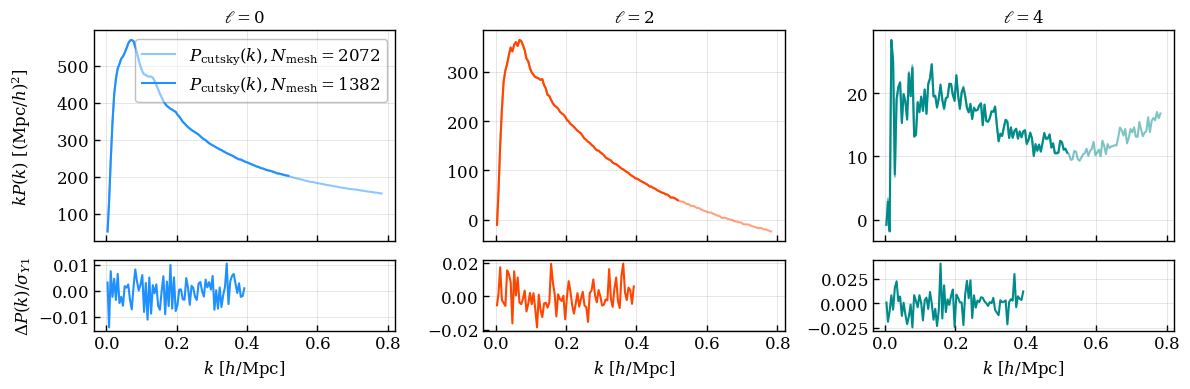

In [80]:
ells = (0, 2, 4)
colors=['dodgerblue', 'orangered', 'darkcyan']

fig, axes = plt.subplots(2, 3, figsize=(12, 4), sharey=False, sharex=True, gridspec_kw={'height_ratios': [3, 1]})

mask = k_cutsky < np.max(k_cutsky_lowres)

for i, ell in enumerate(ells):
    axes[0][i].plot(k_cutsky, k_cutsky * mean_cutsky[i], color=colors[i], ls='-', alpha=0.5, label=r'$P_{\mathrm{cutsky}}(k), N_{\mathrm{mesh}}=2072$')
    axes[0][i].plot(k_cutsky_lowres, k_cutsky_lowres * mean_cutsky_lowres[i], color=colors[i], ls='-', alpha=1, label=r'$P_{\mathrm{cutsky}}(k), N_{\mathrm{mesh}}=1382$')
    axes[0][i].set_title(r'$\ell={}$'.format(ell))

    axes[1][i].plot(k_cutsky[mask], (mean_cutsky_lowres[i] - mean_cutsky[i][mask]) / stdY1[i][mask], color=colors[i], ls='-')
    
axes[0][0].legend()
axes[0][0].set_ylabel(r'$k P(k)$ [$(\mathrm{Mpc}/h)^{2}$]')
axes[1][0].set_ylabel(r'$\Delta P(k) / \sigma_{Y1} $')
for i in range(len(ells)):
    axes[1][i].set_xlabel(r'$k$ [$h$/Mpc]')
plt.tight_layout(pad=0.3)
fig.align_ylabels()
plt.savefig(os.path.join(plots_dir, 'secondgenmocks_cutsky_pk_nmeshtests{}.png'.format('_rpcut{}'.format(rp_cut) if rp_cut else '')), dpi=300)
plt.show()

## window

In [92]:
window_dir = '/global/cfs/cdirs/desi/users/mpinon/secondGenMocksY1/windows/old'
wm_fn = naming(filetype='wm', data_type='{}Y1secondgenmocks'.format('' if masked else 'raw'), imock=None if masked else 0, tracer=tracer, completeness=completeness, region=region, rpcut=rp_cut, direct_edges=direct)
wm_lowres = BaseMatrix.load(os.path.join(window_dir, wm_fn.format('woboxsize2000' if not masked else '')))

window_dir = '/global/cfs/cdirs/desi/users/mpinon/secondGenMocksY1/windows/'
wm_fn = naming(filetype='wm', data_type='{}Y1secondgenmocks'.format('' if masked else 'raw'), imock=None if masked else 0, tracer=tracer, completeness=completeness, region=region, rpcut=rp_cut, direct_edges=direct)
wm = BaseMatrix.load(os.path.join(window_dir, wm_fn.format('' if not masked else '')))

wm_lowres.select_x(xinlim=(np.min(k_cubic), np.max(k_cubic)))
wm.select_x(xinlim=(np.min(k_cubic), np.max(k_cubic)))

In [93]:
window_dir = '/global/cfs/cdirs/desi/users/mpinon/secondGenMocksY1/windows/old'
wm_fn = naming(filetype='wm', data_type='{}Y1secondgenmocks'.format('' if masked else 'raw'), imock=None if masked else 0, tracer=tracer, completeness=completeness, region=region, rpcut=rp_cut, direct_edges=direct)
os.path.join(window_dir, wm_fn.format('wboxsize1000' if not masked else ''))

'/global/cfs/cdirs/desi/users/mpinon/secondGenMocksY1/windows/old/wm_ELG_LOP_complete_SGC.npy'

In [94]:
mean_cubic_interp = interp1d(k_cubic, mean_cubic)(wm.xin[0])

In [95]:
wm_pk_lowres = wm_lowres.value.T.dot(mean_cubic_interp.flatten()).reshape((len(ells), wm_lowres.shape[1]//len(ells)))
wm_pk = wm.value.T.dot(mean_cubic_interp.flatten()).reshape((len(ells), wm.shape[1]//len(ells)))

## diff

In [96]:
# data_dir = '/global/cfs/cdirs/desi/users/mpinon/cubicSecondGenMocks/pk'
# power_diff_list = []

# for imock in range(0, 25):
#     power_cutsky = power_cutsky_list[imock]

#     for los in 'xyz':
#         data_fn = naming(filetype='power', data_type='cubicsecondgenmocks', imock=imock, tracer=tracer[:3], completeness=completeness, region=region, rpcut=0, direct_edges=False, los=los, highres=highres)
#         power_cubic_los = CatalogFFTPower.load(os.path.join(data_dir, data_fn)).poles(ell=ells, complex=False)
#         #power_cubic_los[0] += mean_shotnoise
#         power_cubic_list.append(power_cubic_los)
#     power_cubic = np.mean(power_cubic_list, axis=0)
#     power_cubic_interp = interp1d(k_cubic, power_cubic)(wm.xin[0])
#     power_diff = wm.value.T.dot(power_cubic_interp.flatten()) - power_cutsky.flatten()
#     tmp = power_diff.reshape((len(ells), wm.shape[1]//len(ells)))
#     #tmp[0] = tmp[0] - mean_shotnoise
#     power_diff_list.append(tmp)

# mean_diff = np.mean(power_diff_list, axis=0)
# std_diff = np.std(power_diff_list, axis=0)

## cov

In [97]:
covdir = '/global/cfs/cdirs/desi/survey/catalogs/Y1/LSS/iron/LSScats/v0.6/blinded/pk/covariances/'
c1 = np.loadtxt(os.path.join(covdir, 'cov_gaussian_prerec_ELG_LOPnotqso_GCcomb_0.8_1.1.txt'))
c2 = np.loadtxt(os.path.join(covdir, 'cov_gaussian_prerec_ELG_LOPnotqso_GCcomb_1.1_1.6.txt'))
cov = np.linalg.inv(np.linalg.inv(c1) + np.linalg.inv(c2))
stdY1 = interp1d(np.array((np.arange(0, 0.4, 0.005), )*3).flatten(), np.sqrt(np.diag(cov)), bounds_error=False)(np.array((k_cutsky, )*3)).reshape(mean_cutsky.shape)

In [98]:
k = wm.xout[0]
mask = np.logical_and(k > 0.004, k < 0.395)
kmask = k[mask]

In [99]:
mask1 = k_cutsky < np.max(k_cutsky_lowres)

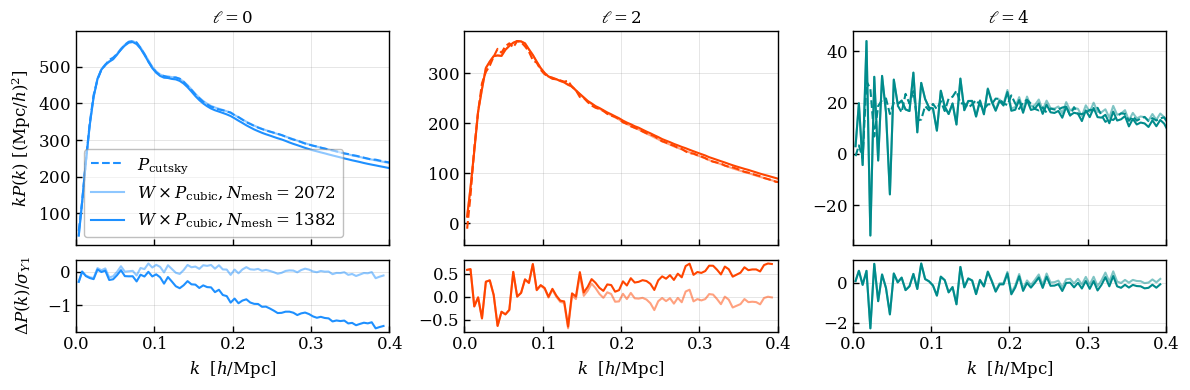

In [100]:
fig, axes = plt.subplots(2, 3, figsize=(12, 4), sharey=False, sharex=True, gridspec_kw={'height_ratios': [3, 1]})
colors=['dodgerblue', 'orangered', 'darkcyan']

for i, ell in enumerate(ells):
    axes[0][i].plot(k_cutsky, k_cutsky * mean_cutsky[i], color=colors[i], ls='--')
    axes[0][i].plot(k, k * wm_pk[i], color=colors[i], ls='-', alpha=0.5)
    axes[0][i].plot(k[mask1], k[mask1] * wm_pk_lowres[i], color=colors[i], ls='-', alpha=1.)
    axes[0][i].set_title(r'$\ell={}$'.format(ell))
       
    scale = 1
    norm = stdY1[i] #(np.abs(mean_cutsky[i]) + std_diff[i]/scale)
    residual = (wm_pk[i] - mean_cutsky[i]) 
    axes[1][i].plot(k_cutsky, residual/norm, color=colors[i], ls='-', alpha=0.5)
    residual = (wm_pk_lowres[i] - mean_cutsky[i][mask1]) 
    norm = stdY1[i][mask1]
    axes[1][i].plot(k_cutsky[mask1], residual/norm, color=colors[i], ls='-', alpha=1.)
    axes[1][i].set_xlim((0, 0.4))
    
axes[0][0].plot([], [], ls='--', color='dodgerblue', label=r'$P_{\mathrm{cutsky}}$')
axes[0][0].plot([], [], ls='-', alpha=0.5, color='dodgerblue', label=r'$W \times P_{\mathrm{cubic}}, N_{\mathrm{mesh}} = 2072$')
axes[0][0].plot([], [], ls='-', alpha=1., color='dodgerblue', label=r'$W \times P_{\mathrm{cubic}}, N_{\mathrm{mesh}} = 1382$')
#axes[1][0].plot([], [], ls='-', color='dodgerblue', label=r'(window x cubic - cutsky) / $\sigma$')
axes[0][0].legend()
#axes[1][0].legend()
axes[0][0].set_ylabel(r'$k P(k)$ [$(\mathrm{Mpc}/h)^{2}$]')
#axes[1][0].set_ylabel(r'$\Delta P(k) / (P(k) + \sigma)$')
axes[1][0].set_ylabel(r'$\Delta P(k) / \sigma_{Y1}$')

for i in range(len(ells)):
    axes[1][i].set_xlabel(r'$k$  [$h$/Mpc]')
    
fig.align_ylabels()
plt.savefig(os.path.join(plots_dir, 'secondgenmocks_cubic_{}cutsky_window_withresiduals{}{}_varyingnmesh.png'.format('masked' if masked else 'raw', '_rpcut{}'.format(rp_cut) if rp_cut else '', '_highres' if highres else '')), dpi=300)